<div class="alert alert-block alert-info" style="font-size:14pt"> 
<h1 align="center">Machine Learning Practice Project (May 2025 Term)</h1>
</div>
<div style="padding-left:3%; padding-right:3%; font-size: 15pt">
    
**Problem Statement:** Engage2Value: From Clicks to Conversions (Predict a customer’s purchase value based on their multi-session behavior across digital touchpoints)

**Type of Problem:** Supervised Regression Problem

**Author:** Tanush Sudheer Tambe

**Roll No.:** 22f3002248

</div>

---

<h1 align="center"> 1. Imports</h1>

***

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor, VotingRegressor, StackingRegressor

from category_encoders import CountEncoder, TargetEncoder 

from lightgbm import LGBMClassifier, early_stopping, LGBMRegressor
from xgboost import XGBRegressor


# Suppressing warning messages
warnings.filterwarnings("ignore")

#Setting max rows to be shown to 300, showing all columns and with full width
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
print("Imports Done !")

Imports Done !


<h1 align="center">2. Data Loading</h1>

---


In [2]:
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

print("Train & Test data loaded !")

Train & Test data loaded !


<h1 align="center">3. Exploratory Data Analysis (EDA)</h1>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
<p style="font-size: 13pt">
Performing EDA on the original train data for deep insights into features for further processing.
Performed in two parts:

- Dataset Overview and Tabular EDA
- Graphical EDA
</p>
</div>

## 3.1 Dataset Overview and Tabular EDA


In [3]:
print(f"The shape of train data is: {df.shape}")
print(f"The shape of test data is: {X_test.shape}")

The shape of train data is: (116023, 52)
The shape of test data is: (29006, 51)


In [4]:
df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 

In [5]:
def feature_summary(X, y):
    df = X
    records = []
    for col in df.columns:
        series = df[col]
        dtype = series.dtype
        count = len(series)
        nulls = series.isna().sum()
        null_pct = 100 * nulls/count
        uniques = series.nunique(dropna=False)
        try:
            corr = series.corr(y)
        except:
            corr = float('nan')
        records.append({
            'feature'    : col,
            'dtype'      : str(dtype),
            'count'      : count,
            'nulls'      : nulls,
            'null_pct'   : null_pct,
            'uniques'    : uniques,
            'corr_with_y': corr
        })  
    summary_df = pd.DataFrame(records)
    summary_df = summary_df[['feature','dtype','count','nulls',
                             'null_pct','uniques','corr_with_y']]
    return summary_df

print("Feature wise summary of train data:\n")
summary = feature_summary(df.drop(columns=["purchaseValue"]), df["purchaseValue"])
summary.sort_values(by = "corr_with_y", ascending=False)

Feature wise summary of train data:



,feature,dtype,count,nulls,null_pct,uniques,corr_with_y
45,totalHits,int64,116023,0,0.000000,225,0.251651
35,pageViews,float64,116023,8,0.006895,176,0.248454
16,sessionNumber,int64,116023,0,0.000000,230,0.230585
10,userId,int64,116023,0,0.000000,100499,-0.003469
14,gclIdPresent,int64,116023,0,0.000000,2,-0.005652
40,date,int64,116023,0,0.000000,638,-0.010338
47,sessionStart,int64,116023,0,0.000000,107388,-0.018537
22,sessionId,int64,116023,0,0.000000,107379,-0.018537
33,trafficSource.adwordsClickInfo.page,float64,116023,111742,96.310214,6,-0.025839
49,device.isMobile,bool,116023,0,0.000000,2,-0.064042


<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
totalHits, pageViews and SessionNumber are numerical fretures which are highly correlated with target variable compared to other numerical features. 

pageViews feature has 8 null values which must be handled appropriately
</div>

In [6]:
print("Statistics for the numerical columns in dataset:")
df.describe().T

Statistics for the numerical columns in dataset:


,count,mean,std,min,25%,50%,75%,max
purchaseValue,116023.0,2.656393e+07,2.051825e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.312950e+10
userId,116023.0,6.109436e+04,3.524076e+04,0.000000e+00,3.060350e+04,6.101400e+04,9.161650e+04,1.222760e+05
gclIdPresent,116023.0,3.701852e-02,1.888080e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sessionNumber,116023.0,2.691311e+00,1.045161e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.470000e+02
totals.visits,116023.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
sessionId,116023.0,1.493429e+09,1.528798e+07,1.470035e+09,1.480066e+09,1.491646e+09,1.505079e+09,1.525157e+09
trafficSource.adwordsClickInfo.page,4281.0,1.019622e+00,1.745165e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
pageViews,116015.0,8.412352e+00,1.434494e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01,4.690000e+02
locationZone,116023.0,8.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
totals.bounces,47148.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
totalHits, pageViews and SessionNumber, features with high correlation with target are heavily right-skewed distributed. The target is heavily right skewed itself, with values upto 75 percentile having 0 value.
</div>

In [7]:
cat_features = ['trafficSource.medium', 'userChannel', 'locationCountry']
for feature in cat_features:
    print("\n")
    print("-"*40)
    print(df[feature].value_counts().head(10))
    print("-"*40)



----------------------------------------
trafficSource.medium
organic      40654
(none)       36837
referral     31657
cpc           4286
affiliate     1777
cpm            802
(not set)       10
Name: count, dtype: int64
----------------------------------------


----------------------------------------
userChannel
Organic Search    46925
Referral          21932
Social            20786
Direct            18886
Paid Search        3406
Display            2301
Affiliates         1777
(Other)              10
Name: count, dtype: int64
----------------------------------------


----------------------------------------
locationCountry
United States     60369
India              5596
United Kingdom     3902
Canada             3226
Vietnam            2119
Japan              2031
Germany            2025
Brazil             1983
Turkey             1821
Thailand           1745
Name: count, dtype: int64
----------------------------------------


In [8]:
missing_table = df.isnull().sum().reset_index()
missing_table.columns = ['feature', 'missing_count']
missing_table['missing_percent'] = (missing_table['missing_count'] / len(df)) * 100
missing_table = missing_table.sort_values('missing_percent', ascending=False)
missing_table[missing_table["missing_percent"]>0]

,feature,missing_count,missing_percent
4,trafficSource.adContent,113060,97.446196
27,trafficSource.adwordsClickInfo.isVideoAd,111742,96.310214
34,trafficSource.adwordsClickInfo.page,111742,96.310214
31,trafficSource.adwordsClickInfo.adNetworkType,111742,96.310214
8,trafficSource.adwordsClickInfo.slot,111742,96.310214
39,trafficSource.referralPath,73309,63.184886
0,trafficSource.isTrueDirect,73133,63.033192
5,trafficSource.keyword,71861,61.936857
40,totals.bounces,68875,59.363230
51,new_visits,35505,30.601691


<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
    
5 categorical features have very high nullity, specifically above **95% nullity**. 4 features have moderate nullity i.e. above **50%** and new_visits has **30% nullity**, indicating need of imputing and feature elimination if the feature contains meaningless values.

**pageViews** an important numerical feature has low nullity which needs to be resolved with appropriate measures. 
</div>

## 3.2 Graphical EDA

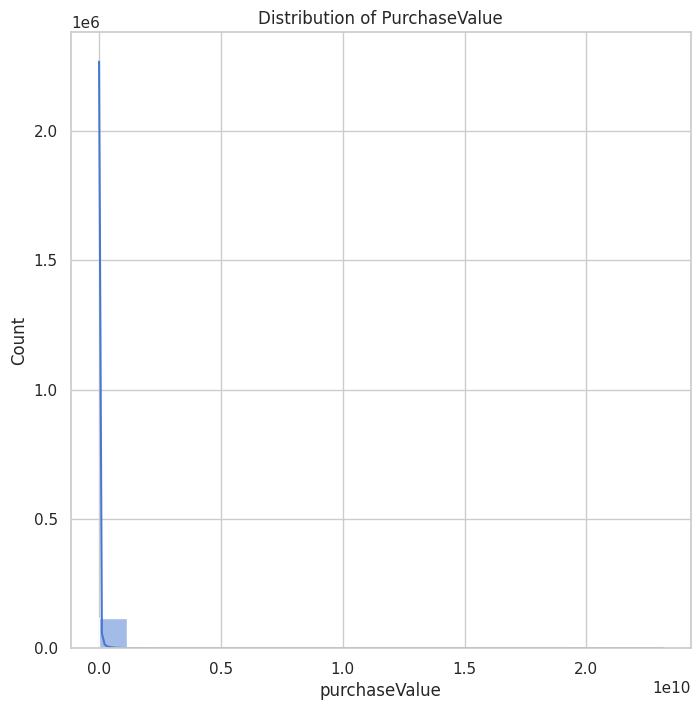

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(8, 8))
sns.histplot(df['purchaseValue'], bins=20, kde=True)
plt.title('Distribution of PurchaseValue')
plt.show()

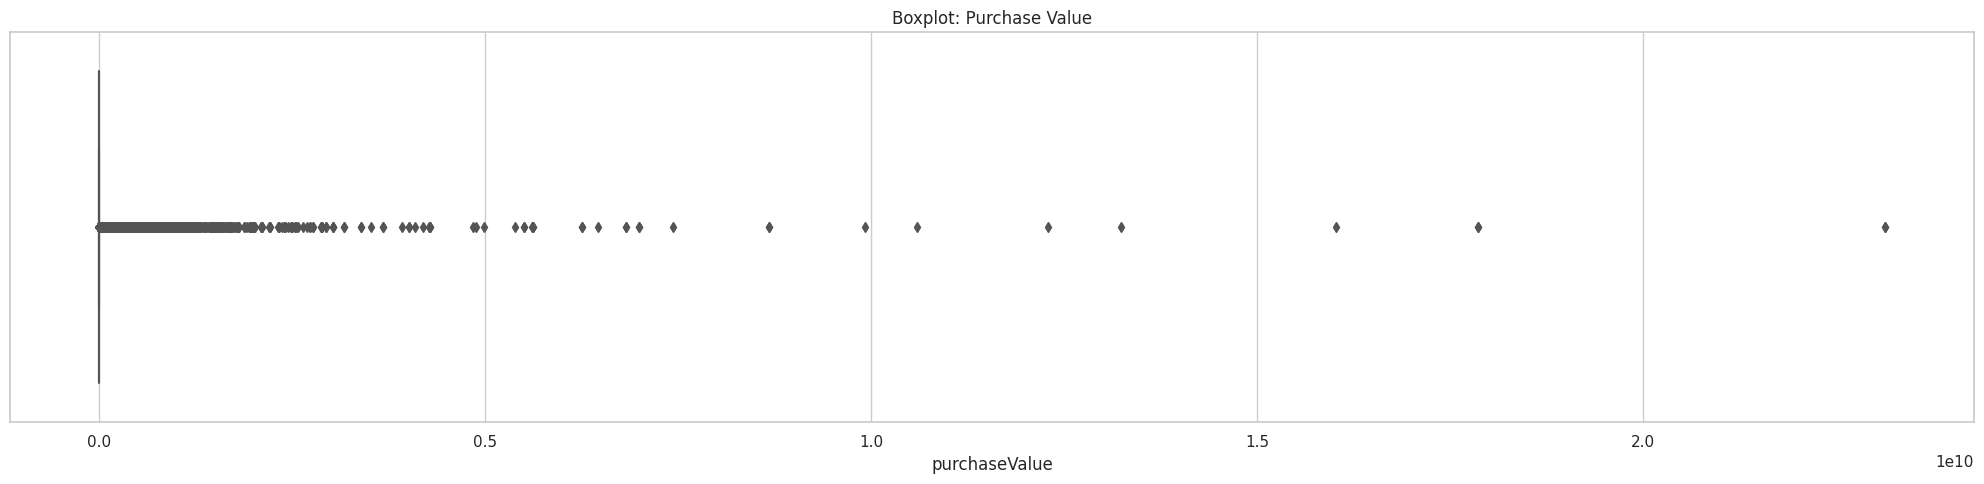

In [10]:
y = df['purchaseValue']
plt.figure(figsize=(20, 5))
sns.boxplot(x=y)
plt.title("Boxplot: Purchase Value")
plt.xlabel("purchaseValue")
plt.tight_layout()
plt.show()

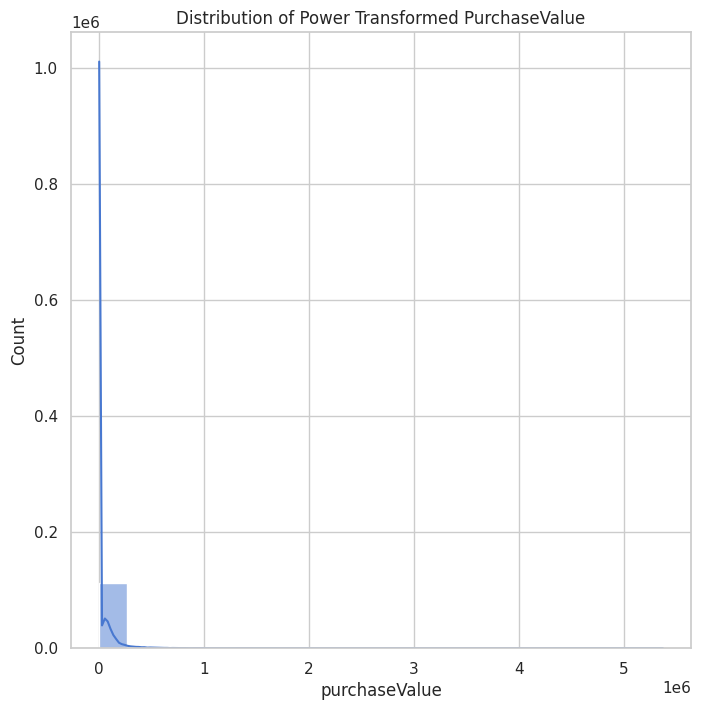

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(8, 8))
sns.histplot(np.power((df['purchaseValue']), 1/ 1.54), bins=20, kde=True)
plt.title('Distribution of Power Transformed PurchaseValue')
plt.show()

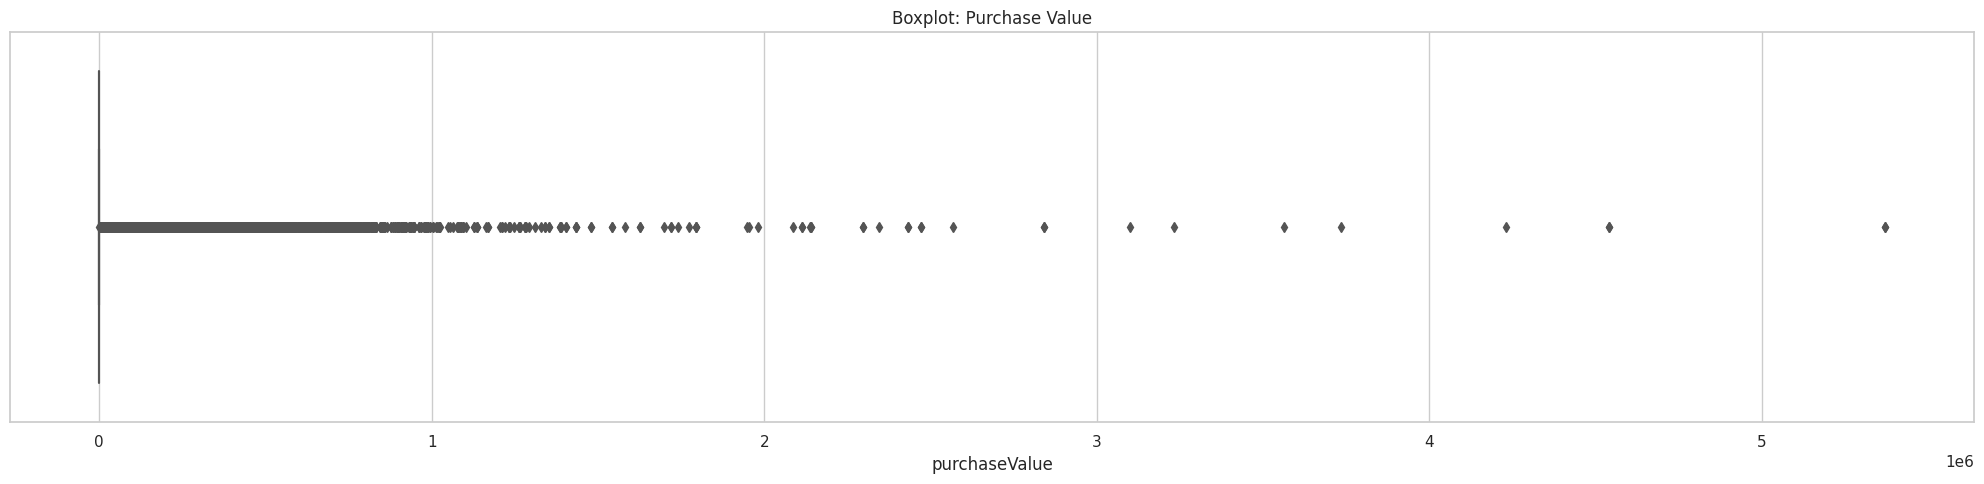

In [12]:
y = np.power((df['purchaseValue']), 1/ 1.54)
plt.figure(figsize=(20, 5))
sns.boxplot(x=y)
plt.title("Boxplot: Purchase Value")
plt.xlabel("purchaseValue")
plt.tight_layout()
plt.show()

In [13]:
print("Original Target Skew: \t\t", df["purchaseValue"].skew())
print("Power Transformed Target Skew:\t",np.power((df['purchaseValue']), 1/ 1.54).skew())
print("log1p Transformed Target Skew:\t",np.log1p(df['purchaseValue']).skew())

Original Target Skew: 		 53.90790631995238
Power Transformed Target Skew:	 12.15418331428959
log1p Transformed Target Skew:	 1.4694034348210194


<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
    
The target is extremely right skewed with **53.9 skew**, potentially making the repression task difficult\
But by power transforming the target with **1/1.54**, the skewness is reduced to **12.15**\
The log1p **squashes** the target too much and reducing skewness to **1.46**, although giving worst results
</div>

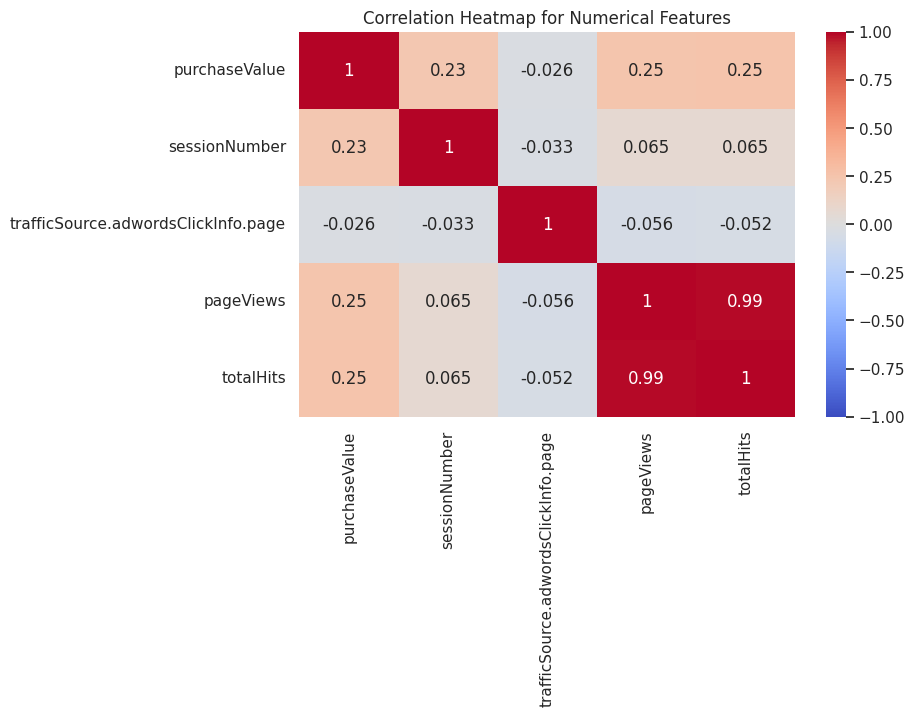

In [14]:
num_features = ['purchaseValue', 'sessionNumber',
                'trafficSource.adwordsClickInfo.page',
                'pageViews', 'totalHits', ]
corr = df[num_features].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

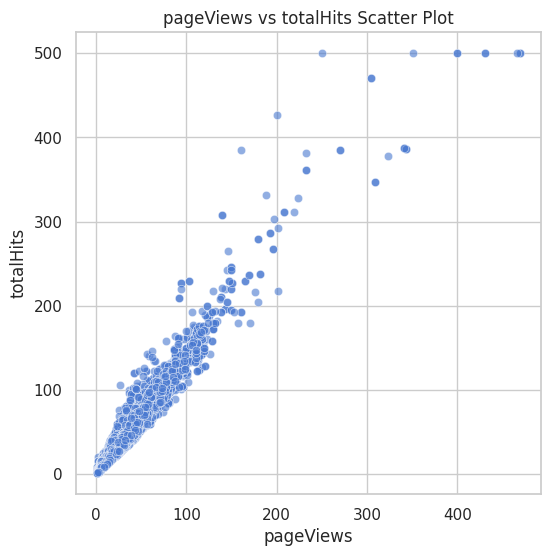

In [15]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='pageViews', y='totalHits', data=df, palette='viridis', alpha=0.6)
plt.title('pageViews vs totalHits Scatter Plot')
plt.show()

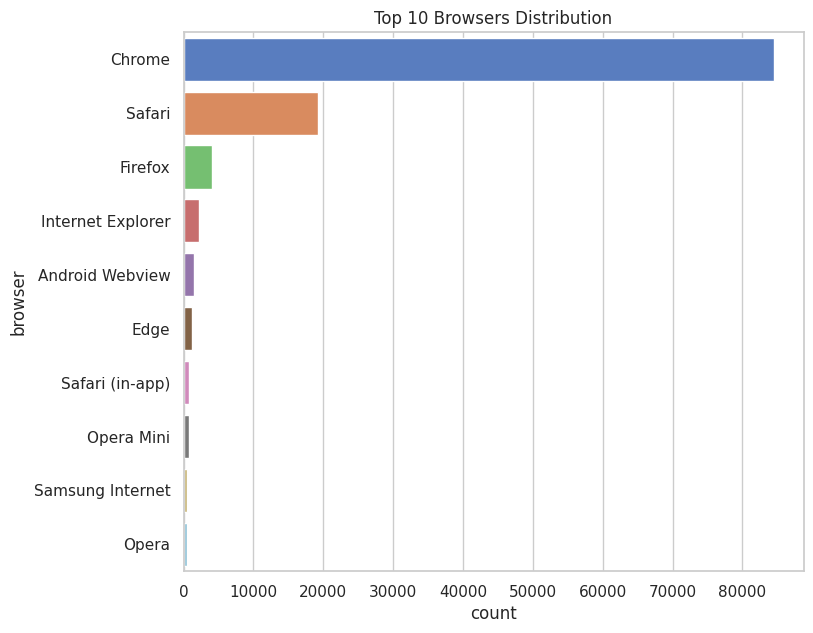

In [16]:
plt.figure(figsize=(8, 7))
sns.countplot(y='browser', data=df, order=df['browser'].value_counts().index[:10])
plt.title('Top 10 Browsers Distribution')
plt.show()

In [17]:
for i in [df, X_test]:
    i['sessionStart_dt'] = pd.to_datetime(i['sessionStart'], unit='s', errors='coerce')
    i['session_dayofweek'] = i['sessionStart_dt'].dt.dayofweek
    i['session_hour'] = i['sessionStart_dt'].dt.hour
    i['session_month'] = i['sessionStart_dt'].dt.month
    i['is_weekend_session'] = i['session_dayofweek'].isin([5,6]).astype(float)
    i['is_business_hour'] = i['session_hour'].between(9, 17).astype(int)
    i['session_day'] = i['sessionStart_dt'].dt.day
    i['session_year'] = i['sessionStart_dt'].dt.year
    
    i['date'] = pd.to_datetime(i['date'], format='%Y%m%d')
    i['day'] = i['date'].dt.day
    i['month'] = i['date'].dt.month
    i['year'] = i['date'].dt.year
    i['day_of_week'] = i['date'].dt.dayofweek
    i['is_weekend'] = i['day_of_week'].isin([5, 6]).astype(float)
    i['quarter'] = i['date'].dt.quarter
    
print("Done !")

Done !


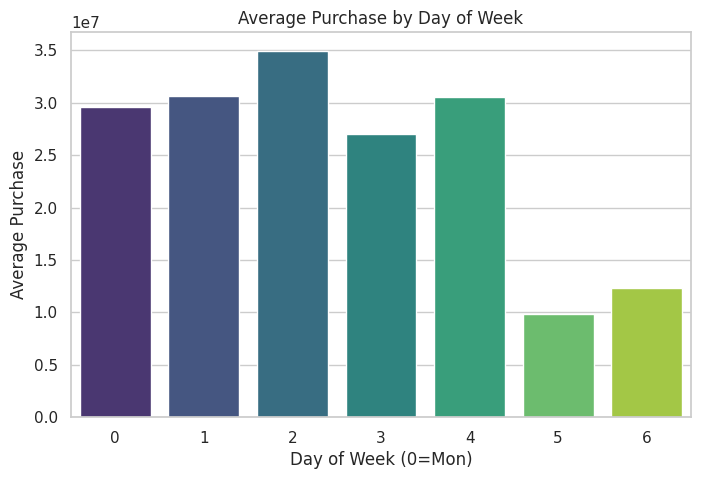

In [18]:
df_day = df.groupby('day_of_week')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='day_of_week', y='purchaseValue', data=df_day, palette='viridis')
plt.title('Average Purchase by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Purchase')
plt.grid(True, axis='y')
plt.show()

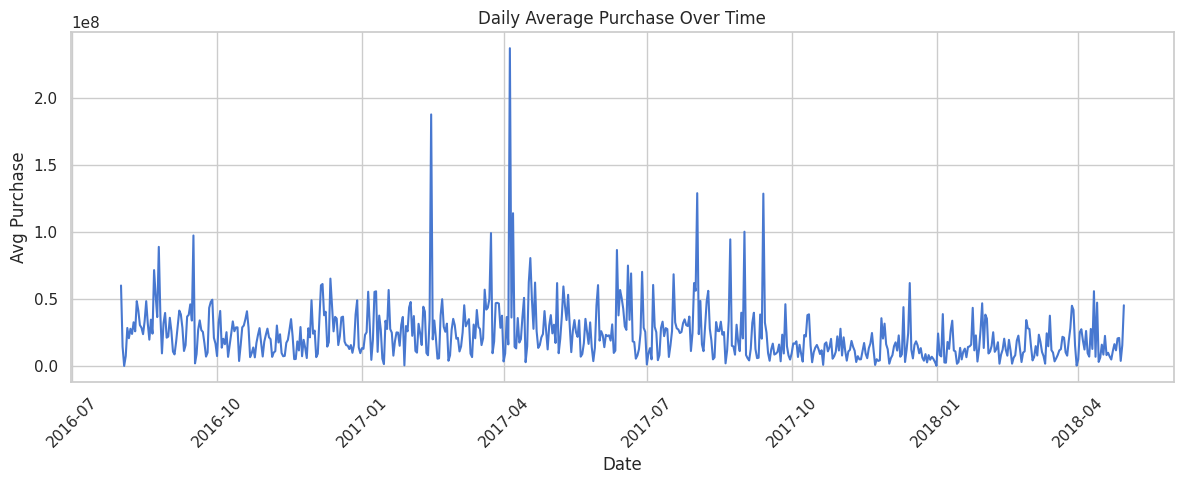

In [19]:
df_date = df.groupby('date')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='purchaseValue', data=df_date)
plt.title('Daily Average Purchase Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Purchase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

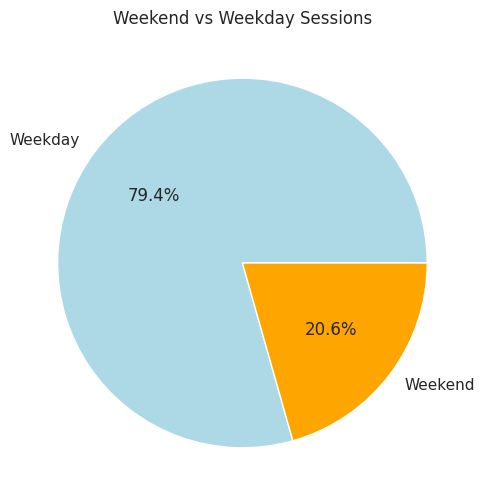

In [20]:
labels = ['Weekday', 'Weekend']
sizes = df['is_weekend'].value_counts(sort=False).values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Weekend vs Weekday Sessions')
plt.show()

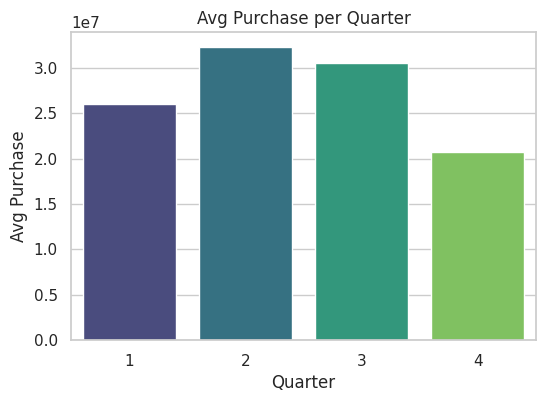

In [21]:
df_q = df.groupby('quarter')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='quarter', y='purchaseValue', data=df_q, palette='viridis')
plt.title('Avg Purchase per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Avg Purchase')
plt.show()

<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
    
**pageViews** and **totalHits** show strong positive correlation which is analyed by heatmap and scatterplot, both are highly correlated with target, making them potential good features for tree based models which could prevent high correlation drawback and exploit the multicollinearity between strong features.\
Time series analysis show average purchaseValue **declines** for weekends, declines on holiday seasons which are usually in Quarter 4 for many countries, opposite of normal expectations.  
</div>

<h1 align="center">4. Data Cleaning</h1>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
<p style="font-size: 13pt">
We clean-impute columns with meaningless values like <strong>"not available in demo dataset"</strong> with null values.<br>
Then we delete columns with <strong>all null values</strong> and columns with <strong>single unique value with zero nullity</strong> as constant features don't contribute towards model building.
</p>
</div>

In [22]:
# Removing meaningless value from dataset
df = df.replace("not available in demo dataset", np.nan)
X_test = X_test.replace("not available in demo dataset", np.nan)

# df = df.dropna(axis=1, how='all')
# X_test = X_test.dropna(axis=1, how='all')
summary = feature_summary(df.drop(columns=["purchaseValue"]), df["purchaseValue"])
useless_cols = summary[
    ((summary['uniques'] == 1) 
     & (summary['nulls'] == 0)) 
     | (summary['null_pct'] == 100)
]['feature'].tolist()

print("Dropping useless columns:", useless_cols)
df = df.drop(columns=useless_cols)
X_test = X_test.drop(columns=useless_cols)

print(f"\nRemaining columns in train data: {df.shape[1]}\n")
summary = feature_summary(df.drop(columns=["purchaseValue"]), df["purchaseValue"])
summary.sort_values(by = "corr_with_y", ascending=False)

Dropping useless columns: ['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']

Remaining columns in train data: 49



,feature,dtype,count,nulls,null_pct,uniques,corr_with_y
29,totalHits,int64,116023,0,0.000000,225,0.251651
23,pageViews,float64,116023,8,0.006895,176,0.248454
10,sessionNumber,int64,116023,0,0.000000,230,0.230585
36,session_hour,int32,116023,0,0.000000,24,0.038017
42,day,int32,116023,0,0.000000,31,-0.000217
40,session_day,int32,116023,0,0.000000,31,-0.001545
6,userId,int64,116023,0,0.000000,100499,-0.003469
9,gclIdPresent,int64,116023,0,0.000000,2,-0.005652
39,is_business_hour,int64,116023,0,0.000000,2,-0.005789
44,year,int32,116023,0,0.000000,3,-0.009397


<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
Multiple features only had <strong>"not available in demo dataset"</strong> value in them which is unhelpful for further processing, thus after removing such features along with features with single unique value i.e. constant features, we are left with 54 features in training data.
</div>

<h2>4.1 Train Test Split</h2>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
<p style="font-size: 13pt">
The train data is stratified into train and validation dataset by using train test split so validation is better representation of test data.<br>
Stratification is done by adding binary series <code>y_strata</code> that represents 0.0 purchaseValue with <code>0</code> and positive purchaseValue by <code>1</code>
</p>
</div>

In [23]:
X = df.drop(columns='purchaseValue')
y = df['purchaseValue']

print("Shape of original data: ",X.shape, "\tShape of original target: ",y.shape)

y_strata = np.where(y == 0, 0, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_strata
)
print("Stratified Train Test Split DONE !")
print("\nShape after split->")
print("Train data:      ", X_train.shape, "\tTarget: ", y_train.shape)
print("Validation data: ", X_val.shape, "\tTarget: ", y_val.shape)

Shape of original data:  (116023, 48) 	Shape of original target:  (116023,)
Stratified Train Test Split DONE !

Shape after split->
Train data:       (92818, 48) 	Target:  (92818,)
Validation data:  (23205, 48) 	Target:  (23205,)


<h2>4.2 Imputation and Type conversion</h2>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
<p>
The null values are imputed with logicaly correct values like: 
</p>

- Alternate boolean values are imputed for null values in boolean columns.
- `(not set)` values are imputed for location type data.
- `(not provided)` or `Other` are imputed for categorical type data with missing values.
- Boolean type features are type casted to `float`, to prevent OneHotEncoder from encoding them.
- Browser feature had multiple values for same logical entity, thus imputed as single value
</div

In [24]:
for df in [X_train, X_val, X_test]:
    df["trafficSource.isTrueDirect"] = df["trafficSource.isTrueDirect"].fillna(value=False)
    df["trafficSource.isTrueDirect"] = df["trafficSource.isTrueDirect"].astype(bool).astype(float)
    
    df["totals.bounces"] = df["totals.bounces"].fillna(value=0.0).astype(float)
    df["totals.bounces"]= df["totals.bounces"].astype(bool).astype(float)
    
    df["trafficSource.adwordsClickInfo.page"] = df["trafficSource.adwordsClickInfo.page"].fillna(0.0).astype(float)
    
    df["pageViews"] = df["pageViews"].fillna(0.0).astype(float)
    df["new_visits"] = df["new_visits"].fillna(0.0).astype(float)
    
    df["trafficSource.adwordsClickInfo.isVideoAd"] = df["trafficSource.adwordsClickInfo.isVideoAd"].fillna(1.0).astype(float)
    df["trafficSource.adwordsClickInfo.isVideoAd"] = df["trafficSource.adwordsClickInfo.isVideoAd"].astype(bool).astype(float)
    
    df["trafficSource.referralPath"] = df["trafficSource.referralPath"].fillna("Other")
    df["trafficSource.adContent"] = df["trafficSource.adContent"].fillna("Other")
    df["trafficSource.adwordsClickInfo.slot"] = df["trafficSource.adwordsClickInfo.slot"].fillna("Other")
    df["trafficSource.adwordsClickInfo.adNetworkType"] = df["trafficSource.adwordsClickInfo.adNetworkType"].fillna("Other")
    df["trafficSource.keyword"] = df["trafficSource.keyword"].fillna("(not provided)")
    df["geoNetwork.region"] = df["geoNetwork.region"].fillna("(not set)")
    df["geoNetwork.city"] = df["geoNetwork.city"].fillna("(not set)")
    df["geoNetwork.metro"] = df["geoNetwork.metro"].fillna("(not set)")
    
    df['browser'] = df['browser'].replace({
        'Firefox': 'Mozilla',
        'Mozilla Compatible Agent': 'Mozilla',
        'Mozilla': 'Mozilla',
        'Safari (in-app)': 'Safari'
    })
    
print("DONE !")

DONE !


<h1 align="center">5. Feature Engineering</h1>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
Based on cleaned data, new useful features were created for improving data quality given to ML models.
</div>

In [25]:
# -----------------------------------
# 1. Session & Interaction Features
# -----------------------------------
for df in [X_train, X_val, X_test]:
    df['hits_per_pageview'] = df['totalHits'] / (df['pageViews'] + 1)
    df['pageviews_per_hour'] = df['pageViews'] / (df['session_hour'] + 1)
    df['session_page_product'] = df['sessionNumber'] * df['pageViews']
    df['session_per_hit'] = df['sessionNumber'] / (df['totalHits'] + 1)
    df['bounce_hit_ratio'] = df['totals.bounces'] / (df['totalHits'] + 1)
    df['pageviews_per_channel'] = df['pageViews'] / (df['userChannel'].map(lambda x: 1 if x == 'Referral' else 2) + 1)

# -----------------------------------
# 2. Combined Features
# -----------------------------------
for df in [X_train, X_val, X_test]:
    df['is_repeat_visitor'] = (df['sessionNumber'] > 1).astype(float)
    df['is_video_ad_and_bounce'] = df['trafficSource.adwordsClickInfo.isVideoAd'] * df['totals.bounces']

# ---------------------------------------------
# 3. Frequency Encoding
# ---------------------------------------------
for col in ['browser', 'geoNetwork.city', 'trafficSource.campaign', 
            # 'userId', 'sessionId'
           ]:
    freqs = X_train[col].value_counts().to_dict()
    for df in [X_train, X_val, X_test]:
        df[f'{col}_freq'] = df[col].map(freqs).fillna(0)

# ---------------------------------------------
# 4. Time based Features
# ---------------------------------------------
for df in [X_train, X_val, X_test]:
    df['is_peak_month'] = df['month'].isin([4, 6, 8]).astype(int)
    df['is_off_season'] = df['month'].isin([10, 11]).astype(int)
    df['is_midweek'] = df['day_of_week'].isin([1, 2, 3]).astype(int)
    df['is_Q2_or_Q3_peak'] = df['quarter'].isin([2, 3]).astype(int)
    df['is_peak_weekday'] = (df['day_of_week'] == 2).astype(int)


print("Added features!")

Added features!


<h3>5.1 Dropping unwanted features</h3>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
    
- The date based columns were dropped after extracting date/time information from them.
- `sessionId` and `userId` based features were separated into different data which will be tested along with leakage free data.

</div>

In [26]:
X_train_id = X_train.copy()
X_val_id = X_val.copy()
X_test_id = X_test.copy()

for col in ['userId', 'sessionId']:
    freqs = X_train_id[col].value_counts().to_dict()
    for df in [X_train_id, X_val_id, X_test_id]:
        df[f'{col}_freq'] = df[col].map(freqs).fillna(0)
        
for df in [X_train_id, X_val_id, X_test_id]:
    df.drop(columns=['sessionStart', 'sessionStart_dt', 'date'], inplace=True)
    df["userId"] = df["userId"].astype(str)
    df["sessionId"] = df["sessionId"].astype(str)

print("Columns from ID dataFrames dropped !")

Columns from ID dataFrames dropped !


In [27]:
for df in X_train, X_val, X_test:
    df.drop(columns=['sessionStart', 'sessionStart_dt', 
                     'date', "sessionId", "userId"], inplace=True)

print("Columns from leakage free dataFrame dropped !")

Columns from leakage free dataFrame dropped !


<h1 align="center">6. Pipeline</h1>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt">
    <p>
Pipeline for numerical and categorical features is made.
    </p>
    
- Power transformation for target was done by using **1.54** as power (found after looping over `np.arange` by 2 digit and 3 digit precision)
- Seperating numerical columns and categorical columns, further seperating categorical columns into
  - Low cardinality columns - for One Hot Encoding
  - High cardinality columns - for Target Encoding
- RobustScaler was used for numerical columns
- Output contains power transformed target encoded data and non transformed data for further processing
</div>

In [28]:
power = 1.54
best_power = 1.54

y_train_pow = np.power(y_train, 1 / power)
y_val_pow = np.power(y_val, 1/ power)

raw_num_cols = X_train.select_dtypes(include=['int32', 'int64', 'float32','float64']).columns.tolist()

NUM_COLS = [col for col in raw_num_cols]
CAT_COLS = list(set(X_train.columns) - set(NUM_COLS))
LOW_CARD = [col for col in CAT_COLS if X_train[col].nunique() <= 10]
HIGH_CARD = [col for col in CAT_COLS if X_train[col].nunique() > 10]

# ------------------------------Pipelines------------------------------
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

low_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(smoothing=10))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, NUM_COLS),
    ('low_card', low_card_pipeline, LOW_CARD),
    ('high_card', high_card_pipeline, HIGH_CARD)
]).set_output(transform="pandas")

pipeline = Pipeline([
    ('preprocess', preprocessor)
])

# -------------------------------------------------------------------------
# Original target encoded data (NO IDs)
X_train_clean = pipeline.fit_transform(X_train, y_train)
X_val_clean = pipeline.transform(X_val)
X_test_clean = pipeline.transform(X_test)

# Power transform target encoded data (NO IDs)
X_train_clean_pow = pipeline.fit_transform(X_train, y_train_pow)
X_val_clean_pow = pipeline.transform(X_val)
X_test_clean_pow = pipeline.transform(X_test)

# -------------------------------------------------------------------------
# Original target encoded data (IDs INCLUDED)
X_train_clean_id = pipeline.fit_transform(X_train_id, y_train)
X_val_clean_id = pipeline.transform(X_val_id)
X_test_clean_id = pipeline.transform(X_test_id)

# Power transform target encoded data (IDs INCLUDED)
X_train_clean_pow_id = pipeline.fit_transform(X_train_id, y_train_pow)
X_val_clean_pow_id = pipeline.transform(X_val_id)
X_test_clean_pow_id = pipeline.transform(X_test_id)

print("Done !")

Done !


<h2>6.1 Post Pipeline Feature Engineering</h2>

---
<div style="padding-left:3%; padding-right:3%;">
<p style="font-size: 13pt">
Post pipeline features are engineered from scaled features.
</p>
</div>

In [29]:
def add_post_pipeline_features(X_clean):
    X_clean['pageviews_business_hour_scaled'] = X_clean['num__pageViews'] * X_clean['num__is_business_hour']
    X_clean['hits_weekend_scaled'] = X_clean['num__totalHits'] * X_clean['num__is_weekend']
    X_clean['efficiency_business'] = X_clean['num__totalHits'] / (X_clean['num__is_business_hour'] + 1)
    X_clean['repeat_hits'] = X_clean['num__is_repeat_visitor'] * X_clean['num__totalHits']
    return X_clean

X_train_clean = add_post_pipeline_features(X_train_clean)
X_val_clean = add_post_pipeline_features(X_val_clean)
X_test_clean = add_post_pipeline_features(X_test_clean)

X_train_clean_pow = add_post_pipeline_features(X_train_clean_pow)
X_val_clean_pow = add_post_pipeline_features(X_val_clean_pow)
X_test_clean_pow = add_post_pipeline_features(X_test_clean_pow)

X_train_clean_pow_id = add_post_pipeline_features(X_train_clean_pow_id)
X_val_clean_pow_id = add_post_pipeline_features(X_val_clean_pow_id)
X_test_clean_pow_id = add_post_pipeline_features(X_test_clean_pow_id)

print("Post-pipeline features added!")

Post-pipeline features added!


In [30]:
feature_summary(X_train_clean_pow, y_train_pow).sort_values(by="corr_with_y", ascending=False)

,feature,dtype,count,nulls,null_pct,uniques,corr_with_y
5,num__pageViews,float64,92818,0,0.0,171,0.496845
7,num__totalHits,float64,92818,0,0.0,217,0.496365
27,num__pageviews_per_channel,float64,92818,0,0.0,238,0.495452
93,efficiency_business,float64,92818,0,0.0,286,0.465288
94,repeat_hits,float64,92818,0,0.0,200,0.445457
22,num__hits_per_pageview,float64,92818,0,0.0,1276,0.396034
24,num__session_page_product,float64,92818,0,0.0,740,0.324092
91,pageviews_business_hour_scaled,float64,92818,0,0.0,137,0.296803
82,high_card__trafficSource.referralPath,float64,92818,0,0.0,129,0.261739
81,high_card__locationCountry,float64,92818,0,0.0,119,0.260977


<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
    
num__pageViews, num__totalHits, num__pageviews_per_channel, efficiency_business, repeat_hits, num__hits_per_pageview, num__session_page_product fretures which are highly correlated with target variable compared to other numerical features.\
All features are now of type **float64**
</div>

<h1 align="center">7. Feature Selection</h1>

---
<div style="padding-left:3%; padding-right:3%;">
<p style="font-size: 13pt">
Feature selection is carried out by only selecting features with at least <strong>0.01 correlation</strong> with target.
</p>
</div>

In [31]:
# ------------- Trimming original scale target encoded data -------------
fs = feature_summary(X_train_clean, y_train)
HIGH_CORR = fs[abs(fs["corr_with_y"])>0.01]["feature"].to_list()

X_train_trim = X_train_clean[HIGH_CORR]
X_val_trim = X_val_clean[HIGH_CORR]
X_test_trim = X_test_clean[HIGH_CORR]

# ------------- Trimming power transformed target encoded data -------------
fs = feature_summary(X_train_clean_pow, y_train_pow)
HIGH_CORR = fs[abs(fs["corr_with_y"])>0.01]["feature"].to_list()

X_train_trim_pow = X_train_clean_pow[HIGH_CORR]
X_val_trim_pow = X_val_clean_pow[HIGH_CORR]
X_test_trim_pow = X_test_clean_pow[HIGH_CORR]


# ------------- Trimming power transformed target encoded data containing IDs -------------
fs = feature_summary(X_train_clean_pow_id, y_train_pow)
HIGH_CORR = fs[abs(fs["corr_with_y"])>0.07]["feature"].to_list()

X_train_trim_pow_id = X_train_clean_pow_id[HIGH_CORR]
X_val_trim_pow_id = X_val_clean_pow_id[HIGH_CORR]
X_test_trim_pow_id = X_test_clean_pow_id[HIGH_CORR]

<h1 align="center">8. Feature Stacking</h1>

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
To enrich data passed to regressor, feature stacking by using K-Means clustering algorithm giving 3 clusters on train data (without target leakage) and Light Gradient Boosting Machine Classifier giving probabilities of whether the target: <code>purchaseValue</code> has zero or non-zero i.e. positive value
</p>

</div>

In [32]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_trim_pow)

# inertias = []
# silhouette_scores = []
# k_values = range(2, 11)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = kmeans.fit_predict(X_train_scaled)
    
#     inertia = kmeans.inertia_
#     silhouette = silhouette_score(X_train_scaled, labels)

#     inertias.append(inertia)
#     silhouette_scores.append(silhouette)

In [33]:
# print(np.round(inertias,2),"\n")
# print(np.round(silhouette_scores, 4))

# '''
# [6580022.73 6114629.99 5757691.67 5545888.83 5280742.17 5095057.5
#  4838553.64 4747861.73 4632441.6 ] 
##[2      3      4      5      6      7      8      9      10    ]
# [0.1233 0.1372 0.1117 0.0833 0.0989 0.0972 0.1025 0.0955 0.0936]
# '''

In [34]:
scaler = StandardScaler()
X_train_trim_scaled = scaler.fit_transform(X_train_trim_pow)
X_val_trim_scaled = scaler.transform(X_val_trim_pow)
X_test_trim_scaled = scaler.transform(X_test_trim_pow)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_trim_scaled)

X_train_stack = X_train_trim_pow.copy()
X_val_stack = X_val_trim_pow.copy()
X_test_stack = X_test_trim_pow.copy()

X_train_stack['cluster'] = kmeans.labels_
X_val_stack['cluster'] = kmeans.predict(X_val_trim_scaled)
X_test_stack['cluster'] = kmeans.predict(X_test_trim_scaled)

print("Clustering added! New 'cluster' feature created.")

Clustering added! New 'cluster' feature created.


In [35]:
X_full = pd.concat([X_train_stack, X_val_stack])
y_full_pow = pd.concat([y_train_pow, y_val_pow])

# Binary target for classifier
y_full_bin = (y_full_pow> 0).astype(int)
y_train_bin = (y_train_pow > 0).astype(int)
y_val_bin = (y_val_pow > 0).astype(int)


clf = LGBMClassifier(
    n_estimators=1000, learning_rate=0.05, max_depth=8,
    num_leaves=31, random_state=42, n_jobs=-1, verbosity=-1
)

clf.fit(X_train_stack, y_train_bin)
val_bin_pred = clf.predict(X_val_stack)

acc = accuracy_score(y_val_bin, val_bin_pred)
prec = precision_score(y_val_bin, val_bin_pred)
rec = recall_score(y_val_bin, val_bin_pred)
f1 = f1_score(y_val_bin, val_bin_pred)

print(f"Classifier Validation Accuracy: {acc:.4f}")
print(f"Validation Precision: {prec:.4f}")
print(f"Validation Recall: {rec:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

clf.fit(X_full, y_full_bin)
train_probs = clf.predict_proba(X_train_stack)[:, 1]
val_probs = clf.predict_proba(X_val_stack)[:, 1]
test_proba = clf.predict_proba(X_test_stack)[:, 1]

X_train_stack['buy_prob'] = train_probs
X_val_stack['buy_prob'] = val_probs
X_test_stack['buy_prob'] = test_proba

Classifier Validation Accuracy: 0.9632
Validation Precision: 0.8814
Validation Recall: 0.9496
Validation F1 Score: 0.9142


In [36]:
feature_summary(X_train_stack, y_train_pow).sort_values(by="corr_with_y", ascending=False)

,feature,dtype,count,nulls,null_pct,uniques,corr_with_y
77,buy_prob,float64,92818,0,0.0,90469,0.575830
2,num__pageViews,float64,92818,0,0.0,171,0.496845
4,num__totalHits,float64,92818,0,0.0,217,0.496365
22,num__pageviews_per_channel,float64,92818,0,0.0,238,0.495452
74,efficiency_business,float64,92818,0,0.0,286,0.465288
75,repeat_hits,float64,92818,0,0.0,200,0.445457
17,num__hits_per_pageview,float64,92818,0,0.0,1276,0.396034
76,cluster,int32,92818,0,0.0,3,0.376449
19,num__session_page_product,float64,92818,0,0.0,740,0.324092
72,pageviews_business_hour_scaled,float64,92818,0,0.0,137,0.296803


<h1 align="center">9. Model Training</h1>

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
After data cleaning, preprocessing, encoding, feature engineering and feature stacking, regression models were trained on power transformed data. Notably, following models were considered:

- Light Gradient Boosting Machine i.e. LightGBM
- eXtreme Gradient Boost i.e. XGBoost
- Extra Trees Regressor
</p>

</div>

## 9.1 Light Gradient Boosting Machine Regressor

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
<code>LightGBMRegressor</code> was trained with default parameters as baseline model.
</p>

</div>

In [37]:
lgb_model = LGBMRegressor(random_state=42, verbosity=-1)

# lgb_model.fit(X_train_stack, y_train_pow)

# y_train_pred_pow = lgb_model.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# r2_train_lgb = r2_score(y_train, y_train_pred)
# print(f"LightGBM R2 on Train: {r2_train_lgb:.4f}")

# y_val_pred_pow = lgb_model.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_val_lgb = r2_score(y_val, y_val_pred)
# print(f"LightGBM R2 on Validation: {r2_val_lgb:.4f}")

## 9.2 eXtreme Gradient Boost

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
<code>XGBRegressor</code> was trained with default parameters as baseline model.
</p>

</div>

In [38]:
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# xgb_model.fit(X_train_stack, y_train_pow)

# y_train_pred_pow = xgb_model.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# r2_train_xgb = r2_score(y_train, y_train_pred)
# print(f"XGBoost R2 on Train: {r2_train_xgb:.4f}")

# y_val_pred_pow = xgb_model.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_val_xgb = r2_score(y_val, y_val_pred)
# print(f"XGBoost R2 on Validation: {r2_val_xgb:.4f}")

## 9.3 Extra Trees Regressor

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
<code>ExtraTreesRegressor</code> was trained with default parameters as baseline model.
</p>

</div>

In [39]:
et_model = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# et_model.fit(X_train_stack, y_train_pow)

# y_train_pred_pow = et_model.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# r2_train_et = r2_score(y_train, y_train_pred)
# print(f"ExtraTrees R2 on Train: {r2_train_et:.4f}")

# y_val_pred_pow = et_model.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_val_et = r2_score(y_val, y_val_pred)
# print(f"ExtraTrees R2 on Validation: {r2_val_et:.4f}")

In [40]:
# models = ['LightGBM', 'XGBoost ', 'ExtraTrees']
# train_r2 = [r2_train_lgb, r2_train_xgb, r2_train_et]
# val_r2 = [r2_val_lgb, r2_val_xgb, r2_val_et]
# print("Model\t\t\tTrain R2\tValidation R2")
# for i in range(len(models)):
#     print(f"{models[i]}\t\t{train_r2[i]:.4f}\t\t{val_r2[i]:.4f}")
# x = range(len(models))

In [41]:
# plt.figure(figsize=(9,5))
# plt.bar(x, train_r2, width=0.4, label='Train R2', align='center')
# plt.bar([i + 0.4 for i in x], val_r2, width=0.4, label='Validation R2', align='center')
# plt.xticks([i + 0.2 for i in x], models, fontsize=7)
# plt.ylabel("R2 Score")
# plt.title("Model Comparison")
# plt.legend(loc='upper right', fontsize=7)
# plt.show()

<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
    
**LightGBM** is currently **underfitting**, giving subpar results both on train and validation sets.\
**XGBoost** shows significant gap between train and validation r2 indicating **overfitting**\
SImilarly, **ExtraTrees** also shows **extreme overfitting** to train set having perfect 1.00 r2 for train while performing much worst on validation set.

Overall, **LightGBM** has smallest gap between the train and validation r2, and thus must be explored and tuned further.
</div>

<h1 align="center">10. Hyperparameter Tuning</h1>

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
After baseline regression models were trained on power transformed data. The models were tuned by using <code>RandomizedSearchCV</code>:

- eXtreme Gradient Boost i.e. XGBoost
- Light Gradient Boosting Machine i.e. LightGBM

Then the ensemble of the tuned models was made and tested on validation dataset.
</p>

</div>

## 10.1 Hyperparameter Tuning for XGBRegressor

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
<code>XGBRegressor</code> was tuned by using RandomizedSearchCV
</p>

</div>

In [42]:
power = 1.54

xgb_param_grid = {
    'n_estimators': [900, 1000, 1100, 1300],
    'learning_rate': [0.03, 0.04, 0.05],
    'max_depth': [8, 10, 12, 15],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.5, 1, 5],
    'reg_alpha': [0, 5, 10, 15],
    'reg_lambda': [0, 5, 10, 15]
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    # verbosity=0,
    tree_method='hist'
)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=47,
    n_jobs=-1
)

# xgb_search.fit(X_train_stack, np.power(y_train, 1/power))

# print("Best Hyperparameters:\n", xgb_search.best_params_)
# print("Best CV R² Score:", round(xgb_search.best_score_, 4))

# best_xgb = xgb_search.best_estimator_

# y_train_pred_pow = best_xgb.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# y_val_pred_pow = best_xgb.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_train = r2_score(y_train, y_train_pred)
# r2_val = r2_score(y_val, y_val_pred)

# print(f"Train R2: {r2_train:.4f} | Validation R2: {r2_val:.4f}")

### Output:

```
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters:
 {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 1000, 'max_depth': 12, 'learning_rate': 0.04, 'gamma': 1, 'colsample_bytree': 0.7}
Best CV R² Score: 0.5613
Train R2: 0.9937 | Validation R2: 0.8221
```

In [43]:
xgb_best_params = {
    'subsample': 0.8, 
    'reg_lambda': 10, 
    'reg_alpha': 10, 
    'n_estimators': 1000, 
    'max_depth': 12, 
    'learning_rate': 0.04, 
    'gamma': 1, 
    'colsample_bytree': 0.7
}

In [44]:
xgb_model=XGBRegressor(
    random_state = 42, verbosity=0,
    **xgb_best_params
)


# xgb_model.fit(X_train_stack, y_train_pow)

# y_train_pred_pow = xgb_model.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# y_val_pred_pow = xgb_model.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_train_xgb = r2_score(y_train, y_train_pred)
# r2_val_xgb = r2_score(y_val, y_val_pred)
# print(f"R2 on Train: {r2_train_xgb:.4f} | R2 on Validation: {r2_val_xgb:.4f}")

## 10.2 Hyperparameter Tuning for LGBMRegressor

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
<code>LGBMRegressor</code> was tuned by using RandomizedSearchCV
</p>

</div>

In [45]:
param_grid = {
    'n_estimators': [900, 1000, 1100, 1300],
    'learning_rate': [0.03, 0.04, 0.05],
    'max_depth': [12, 15, 17, 20, 22],
    'num_leaves': [256, 384, 416, 512, 768],
    'min_child_samples': [4, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'reg_alpha': [15, 18, 20, 25, 35],
    'reg_lambda': [15, 18, 20, 25, 35],
}

lgb_model = LGBMRegressor(random_state=24, verbosity=-1)

search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

# search.fit(X_train_stack, y_train_pow)

# print("Best Hyperparameters:\n", search.best_params_)
# print("Best CV R2 Score:", round(search.best_score_,4))

# best_params= search.best_params_
# model = search.best_estimator_

# y_train_pred_pow = model.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# y_val_pred_pow = model.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_train = r2_score(y_train, y_train_pred)
# r2_val = r2_score(y_val, y_val_pred)
# print(f"R2 on Train: {r2_train:.4f} | R2 on Validation: {r2_val:.4f}")

### output of RandomizesSearchCV:

```
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters:
 {'subsample': 0.9, 'reg_lambda': 15, 'reg_alpha': 20, 'num_leaves': 512, 'n_estimators': 1000,  'min_child_samples': 5, 'max_depth': 20, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best CV R2 Score: 0.5652
R2 on Train: 0.9892 | R2 on Validation: 0.7955
```

---

<div style="padding-left:3%; padding-right:3%;">
<p style="font-size: 13pt">
After hyperparameter tuning by using <code>RandomizedSearchCV</code>, the output is saved in <code>best_params</code> which is also copied below for ease of operation.
</p>
</div>

In [46]:
best_params={
    'subsample': 0.9, 
    'reg_lambda': 15, 
    'reg_alpha': 20, 
    'num_leaves': 512, 
    'n_estimators': 1000, 
    'min_child_samples': 5, 
    'max_depth': 20, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.6
}

In [47]:
best_model = None

lgbm_model=LGBMRegressor(random_state = 42, verbosity = -1, **best_params)

# lgbm_model.fit(X_train_stack, y_train_pow)

# y_train_pred_pow = lgbm_model.predict(X_train_stack)
# y_train_pred = np.power(np.maximum(y_train_pred_pow, 0), power)

# y_val_pred_pow = lgbm_model.predict(X_val_stack)
# y_val_pred = np.power(np.maximum(y_val_pred_pow, 0), power)

# r2_train_lgb = r2_score(y_train, y_train_pred)
# r2_val_lgb = r2_score(y_val, y_val_pred)
# print(f"R2 on Train: {r2_train_lgb:.4f} | R2 on Validation: {r2_val_lgb:.4f} gap: {(r2_train_lgb-r2_val_lgb):.4f}")

# best_model = lgbm_model

In [48]:
best_params_reg={
    'subsample': 0.9, 
    'reg_lambda': 20, 
    'reg_alpha': 20,
    'num_leaves': 512, 
    'n_estimators': 1000, 
    'min_child_samples': 5, 
    'max_depth': 20, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.5
}

best_model = None

lgbm_model_id=LGBMRegressor(random_state = 42, verbosity = -1, **best_params_reg)

lgbm_model_id.fit(X_train_trim_pow_id, y_train_pow)

y_train_pred_pow_id = lgbm_model_id.predict(X_train_trim_pow_id)
y_train_pred_id = np.power(np.maximum(y_train_pred_pow_id, 0), power)

y_val_pred_pow_id = lgbm_model_id.predict(X_val_trim_pow_id)
y_val_pred_id = np.power(np.maximum(y_val_pred_pow_id, 0), power)

r2_train_lgb_id = r2_score(y_train, y_train_pred_id)
r2_val_lgb_id = r2_score(y_val, y_val_pred_id)
print(f"R2 on Train: {r2_train_lgb_id:.4f} | R2 on Validation: {r2_val_lgb_id:.4f} gap: {(r2_train_lgb_id-r2_val_lgb_id):.4f}")

best_model_id = lgbm_model_id

R2 on Train: 0.9825 | R2 on Validation: 0.6864 gap: 0.2960


## 10.3 VotingRegressor by using the Tuned Models

---

<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
<p>
Tuned <code>LGBMRegressor</code> were used to form ensemble- Voting Regressor

Multiple <code>LGBMRegressor</code> were ensembled with slightly lower and higher regularization.
</p>

</div>

In [49]:
best_params_1={
    'subsample': 0.9, 
    'reg_lambda': 15, 
    'reg_alpha': 20, 
    'num_leaves': 512, 
    'n_estimators': 1000, 
    'min_child_samples': 5, 
    'max_depth': 20, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.6
}
best_params_2={
    'subsample': 0.9, 
    'reg_lambda': 13, 
    'reg_alpha': 18, 
    'num_leaves': 512, 
    'n_estimators': 1000, 
    'min_child_samples': 5, 
    'max_depth': 20, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.6
}
best_params_3={
    'subsample': 0.9, 
    'reg_lambda': 17, 
    'reg_alpha': 22, 
    'num_leaves': 512, 
    'n_estimators': 1000, 
    'min_child_samples': 5, 
    'max_depth': 20, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.6
}
best_params_4={
    'subsample': 0.9, 
    'reg_lambda': 15, 
    'reg_alpha': 20, 
    'num_leaves': 512, 
    'n_estimators': 1300, 
    'min_child_samples': 5, 
    'max_depth': 20, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.6
}
best_params_5={
    'subsample': 0.9, 
    'reg_lambda': 15, 
    'reg_alpha': 20, 
    'num_leaves': 512, 
    'n_estimators': 1300, 
    'min_child_samples': 5, 
    'max_depth': 16, 
    'learning_rate': 0.05, 
    'colsample_bytree': 0.6
}

In [50]:
power = 1.54
ensemble_2 = VotingRegressor(
    estimators=[('lgb1', LGBMRegressor(random_state = 42, verbosity = -1, **best_params_1)),
                ('lgb2', LGBMRegressor(random_state = 41, verbosity = -1, **best_params_2)),
                ('lgb3', LGBMRegressor(random_state = 43, verbosity = -1, **best_params_3)),
                ('lgb4', LGBMRegressor(random_state = 40, verbosity = -1, **best_params_4)),
                ('lgb5', LGBMRegressor(random_state = 47, verbosity = -1, **best_params_5)),
               ],      
)


# ensemble_2.fit(X_train_stack, y_train_pow)

# train_preds_pow = ensemble_2.predict(X_train_stack)
# val_preds_pow = ensemble_2.predict(X_val_stack)

# train_preds = np.power(np.maximum(train_preds_pow, 0), power)
# val_preds = np.power(np.maximum(val_preds_pow, 0), power)

# r2_train_es = r2_score(y_train, train_preds)
# r2_val_es = r2_score(y_val, val_preds)

# best_model = ensemble_2
# print(f"Ensemble R2 on Train: {r2_train_es:.4f}")
# print(f"Ensemble R2 on Validation: {r2_val_es:.4f}")

In [51]:
# models = ['Tuned LightGBM No IDs', 'Tuned LightGBM with IDs', 'Tuned XGBoost No IDs','Tuned Ensemble No IDs']
# train_r2 = [r2_train_lgb,r2_train_lgb_id, r2_train_xgb, r2_train_es]
# val_r2 = [r2_val_lgb,r2_val_lgb_id, r2_val_xgb, r2_val_es]
# print("Model\t\t\t\tTrain R2\tValidation R2")
# for i in range(len(models)):
#     print(f"{models[i]}\t\t{train_r2[i]:.4f}\t\t{val_r2[i]:.4f}")

# x = range(len(models))

In [52]:
# plt.figure(figsize=(9,5))
# plt.bar(x, train_r2, width=0.4, label='Train R2', align='center')
# plt.bar([i + 0.4 for i in x], val_r2, width=0.4, label='Validation R2', align='center')

# plt.xticks([i + 0.2 for i in x], models, fontsize=6)
# plt.ylabel("R2 Score")
# plt.ylim(0.7, 1.0)
# plt.title("Model Comparison")
# plt.legend(loc='upper right', fontsize=7)
# plt.show()

<div class="alert alert-block alert-info" style="font-size:14pt"> 
<strong>Key Insights:</strong><br>
    
The **Tuned LightGBM without IDs** now is overfitting but also giving **0.698** r2 on public test set.\
The **Tuned LightGBM with IDs** now is also overfitting due to data leakage from IDs but is giving **0.728** r2 on public test set, which is current best.\
The **Tuned XGBoost** performs well on train and validation data but performs poorly on public test.\
The **Ensemble** of 5 **LightGBM without IDs** performs extremely well for model withoug relying on data leakage from IDs and gives **0.7** r2 on public test set. 
</div>

<h1 align="center">Submission</h1>

---
<div style="padding-left:3%; padding-right:3%; font-size: 13pt;">
Submitting the predictions in given format
</div>

In [53]:
best_model = lgbm_model_id


X_full = pd.concat([X_train_stack, X_val_stack])
y_full_pow = pd.concat([y_train_pow, y_val_pow])
X_full_id = pd.concat([X_train_trim_pow_id, X_val_trim_pow_id])

best_model.fit(X_full_id, y_full_pow)
print("Model Fitted !")

Model Fitted !


In [54]:
X_full.shape, X_train_stack.shape

((116023, 78), (92818, 78))

In [55]:
best_power=1.54

# y_test_pred_pow = best_model_1.predict(X_test_stack)
# y_test_pred = np.power(np.maximum(y_test_pred_pow, 0), best_power)

y_test_pred_pow_id = best_model.predict(X_test_trim_pow_id)
y_test_pred = np.power(np.maximum(y_test_pred_pow_id, 0), best_power)

# y_test_pred_hybrid = np.where(y_test_pred_id >1000, y_test_pred_id, y_test_pred)



min_nonzero = y_train[y_train > 0].min()
clip_threshold = min_nonzero / 1.5

y_pred_clipped = y_test_pred.copy()
y_pred_clipped[y_pred_clipped < clip_threshold] = 0
y_pred = y_pred_clipped
print("Prediction Done !")

Prediction Done !


In [56]:
y_pred.shape[0], X_test_clean.shape[0]

(29006, 29006)

In [57]:
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
submission.to_csv('submission.csv',index=False)
print("DONE")

DONE










 
---
---

# Milestones
---

## Milestone 1

<div style="font-size:13pt">

```python
# 1.What is the correlation between the number of pageviews and the purchase value, considering only users who did not bounce?
# [ ] 0.154
# [ ] 0.342
# [x] 0.225
# [ ] 0.411

X[X["totals.bounces"]!=1.0].pageViews.corr(y)


# 2.Among users from different continents, which continent has the highest average 'totalHits'?
# [ ] Europe
# [ ] Asia
# [ ] Africa
# [ ] Oceania
# [x] Americas

continent_wise_totalHits = X.groupby("geoNetwork.continent")["totalHits"].mean()
sorted_continent_wise_totalHits=continent_wise_totalHits.sort_values(ascending=False)
print("Among users from different continents, which continent has the highest average 'totalHits'?")
print("Answer: ",sorted_continent_wise_totalHits.idxmax())
sorted_continent_wise_totalHits


# 3.For users who made a purchase, what is the most common traffic source (medium)?
# [ ] referral
# [ ] organic
# [ ] affiliate
# [ ] cpc
# [ ] cpm
# [x] (none)

traffic_source_grouped = df[df["purchaseValue"]!=0.0].groupby("trafficSource.medium").size()
traffic_source_grouped.idxmax()

# 4.Which combination of operating system and browser is most common among users who made a purchase?
# [x] ('Macintosh', 'Chrome')
# [ ] ('Windows', 'Edge')
# [ ] ('Andriod', 'Internet Explorer')
# [ ] ('iOS', 'Internet Explorer')

X.os.value_counts()
X.browser.value_counts()
os_browser_1 = X[(X["os"]=="Macintosh")&(X["browser"]=="Chrome")]
os_browser_2 = X[(X["os"]=="Windows")&(X["browser"]=="Edge")]
os_browser_3 = X[(X["os"]=="Android")&(X["browser"]=="Internet Explorer")]
os_browser_4 = X[(X["os"]=="iOS")&(X["browser"]=="Internet Explorer")]

choices= ['Macintosh & Chrome','Windows & Edge',
          'Andriod & Internet Explorer','iOS & Internet Explorer']

values = [os_browser_1.shape[0], os_browser_2.shape[0], 
          os_browser_3.shape[0], os_browser_4.shape[0]]

os_browser_frame = pd.DataFrame(values, index=choices, columns=["count"])
os_browser_frame.sort_values(by="count",ascending=False)

# 5.What is the ratio of average number of hits for sessions that resulted in a purchase compared to those that did not?
# [ ] 9.51
# [x] 8.62
# [ ] 7.12
# [ ] 6.77

purchase_average = df[df["purchaseValue"]>0]["totalHits"].mean()
not_purchase_average = df[df["purchaseValue"]==0]["totalHits"].mean()
purchase_average/not_purchase_average

# 6.What is the proportion of 'organic' sessions in comparison to all other types of sessions from each traffic source medium?
# [x] 0.35
# [ ] 0.12
# [ ] 0.22
# [ ] 0

all_sessions = df.shape[0]
organic_sessions = df[df["trafficSource.medium"]=="organic"].shape[0]
organic_sessions/all_sessions

# 7. Which referral path is most common for sessions that resulted in a purchase?
# [ ] '/offer/2145'
# [ ] '/mail/u/1/'
# [ ] '/yt/about/'
# [x] '/'

purchased = df[df["purchaseValue"]>0]
purchased["trafficSource.referralPath"].value_counts().head(1)

# 8.Which operating system has the highest average purchase value?
# [ ] iOS
# [ ] Windows
# [ ] Andriod
# [x] Chrome OS

os_avg_purchaseValue = df.groupby("os")["purchaseValue"].mean()
os_avg_purchaseValue.sort_values(ascending=False).head(1)

# 9.What is the average number of sessions per user?
# [ ] 1
# [ ] 2
# [ ] 3
# [x] 1.15

avg_session_per_user = df.groupby("userId")["sessionId"].nunique().mean()
print(round(avg_session_per_user, 2))

# 10.How many unique users are there in the dataset?
# [ ] 500122
# [x] 100499
# [ ] 200099
# [ ] 400411

df["userId"].nunique()

# 11.Explain the Data using any Exploratory Data Analysis (EDA) you have used.
# 12.Mention the references you have used for these tasks
```

</div>

---

## Milestone 2

<div style="font-size:13pt">
    
```python
# 1.When visualizing the distribution of totalHits across the dataset, which of the following would be most accurate?
# The distribution is normally distributed
# The distribution is right-skewed with most sessions having fewer than 10 hits
# The distribution is left-skewed with most sessions having more than 20 hits
# The distribution is uniform across all possible values

df['totalHits'].hist(bins=100)

# What is the correlation coefficient between pageViews and purchaseValue for mobile users only?
# 0.19
# 0.31
# 0.37
# 0.42

dfm=df[df["deviceType"]=="mobile"]
c = dfm["pageViews"].corr(dfm["purchaseValue"])
np.round(c,2)
mobile_df = df[df['device.isMobile'] == True]
mobile_df[['pageViews', 'purchaseValue']]
corr_mobile = mobile_df['pageViews'].corr(mobile_df['purchaseValue'])
print("Correlation:", corr_mobile)

# A data scientist created a model to predict purchases using a 70-30 stratified train-validation split. If the validation set contains 20.68% of records with purchases and there were 23,985 purchase records in total, approximately how many purchase records were in the training set?
# 12,789
# 16,789
# 19,533
# 21,389

total_purchases = 23985
ratio = 0.7
purchases_in_train = total_purchases * ratio
int(purchases_in_train)

# When normalizing the purchase value column, what would be the approximate standard deviation of the normalized values?

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
purchase_vals = df[['purchaseValue']].dropna()
scaled = scaler.fit_transform(purchase_vals)
round(scaled.std(), 2)

# If we build a linear regression model to predict purchase value using totalHits and pageViews as features, which coefficient would likely have a larger magnitude?
# totalHits coefficient
# pageViews coefficient
# Both would have equal magnitudes
# It cannot be determined from the available information

from sklearn.linear_model import LinearRegression
df_lr = df[['totalHits', 'pageViews', 'purchaseValue']].dropna()
X = df_lr[['totalHits', 'pageViews']]
y = df_lr['purchaseValue']
lr = LinearRegression().fit(X, y)
print("totalHits:", round(lr.coef_[0], 2), ", pageViews:", round(lr.coef_[1], 2))
if lr.coef_[0] > lr.coef_[1]:
    print("Coeffiient with larger magnitude: totalHits")
else:
    print("Coeffiient with larger magnitude: pageViews")
    
# When using SGD to build a binary classifier for predicting whether a user will make a purchase based on their session data, which of these loss functions would be most appropriate?
# Mean Squared Error
# Hinge Loss
# Binary Cross-Entropy Loss
# Mean Absolute Error

# What percentage of the dataset has missing values in the totals.bounces column?

missing_bounces = df['totals.bounces'].isnull().sum()
missing_pct = round(100 * missing_bounces / len(df), 2)
str(missing_pct)+"%"

# When examining the correlation matrix of the e-commerce dataset features, there is an extremely high correlation (0.986) between totalHits and pageViews. What is the most appropriate action to take before building a linear regression model?
# Use both features as is, as the model can handle correlated features
# Perform Principal Component Analysis (PCA) before model building
# Remove one of the two highly-correlated features
# Apply Ridge regularization with high alpha values

corr_val = df[['totalHits', 'pageViews']].dropna().corr().iloc[0, 1]
print("\nCorrelation between totalHits & pageViews:", round(corr_val, 3))


# Analysis of the e-commerce dataset revealed that removing just 1% of extreme outliers in the purchaseValue variable increased the model's R² from 0.11 to 0.28. What is the most significant implication of this finding?
# The original model was severely underfitting the data
# The outliers were likely data entry errors and should be discarded permanently
# Extreme purchase values have a disproportionate effect on coefficient estimation
# Linear models are not appropriate for e-commerce purchase prediction

from sklearn.metrics import r2_score
q99 = df['purchaseValue'].quantile(0.99)
filtered = df[df['purchaseValue'] <= q99][['totalHits', 'pageViews', 'purchaseValue']].dropna()
X_filt = filtered[['totalHits', 'pageViews']]
y_filt = filtered['purchaseValue']
model_filt = LinearRegression().fit(X_filt, y_filt)
r2 = r2_score(y_filt, model_filt.predict(X_filt))
print("\nR2 score after removing 1% outliers:", round(r2, 2))


```

</div>

---

## Milestone 3
<div style="font-size:13pt">
    
```python
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score

# Read Data
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
X = df.drop(columns=["purchaseValue"])
y = df["purchaseValue"]

print("Data Loaded !")
# Identify Columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64', 'bool']).columns.tolist()

# Preprocessing Pipelines
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, categorical_cols),
    ('num', num_pipeline, numerical_cols)
])
print("Pipelines Defined !")
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Full Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit & Transform
X_train_processed = pipeline.fit_transform(X_train)
X_val_processed = pipeline.transform(X_val)

print("Preprocessing DONE !")
# ----------------- Model 1: RandomForestRegressor -----------------

param_grid_rf = {
    "max_depth": [20, 30],
    "min_samples_split": [2, 5],
    "n_estimators": [50, 100]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring="r2", n_jobs=-1)
grid_rf.fit(X_train_processed, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val_processed)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"Random Forest Validation R2 Score: {r2_rf:.2f}")


print("Random Forest DONE!")
# ----------------- Model 2: AdaBoostRegressor -----------------

param_grid_ada = {
    "n_estimators": [10, 20, 30],
    "learning_rate": [3, 9]
}

ada = AdaBoostRegressor(random_state=42)
grid_ada = GridSearchCV(ada, param_grid_ada, cv=3, scoring="r2", n_jobs=-1)
grid_ada.fit(X_train_processed, y_train)

print("Best AdaBoost Params:", grid_ada.best_params_)

best_ada = grid_ada.best_estimator_
y_pred_ada = best_ada.predict(X_val_processed)
r2_ada = r2_score(y_val, y_pred_ada)
print(f"AdaBoost Validation R2 Score: {r2_ada:.2f}")

print("AdaBoost DONE!")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import scipy.stats as stats

param_dist_gbr = {
    'n_estimators': [50, 75, 100], 
    'learning_rate': stats.uniform(0.01, 0.1), 
    'max_depth': [3, 4, 5],
    'subsample': stats.uniform(0.8, 0.2),
    'min_samples_split': [2, 5]
}

# Model Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

rand_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist_gbr,
    n_iter=8,  
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2, 
    random_state=42
)

rand_search_gbr.fit(X_train_processed, y_train)

print("\nBest GradientBoosting Parameters Found:")
print(rand_search_gbr.best_params_)

y_pred_gbr = rand_search_gbr.best_estimator_.predict(X_val_processed)
r2_gbr = r2_score(y_val, y_pred_gbr)
print(f"\nGradientBoosting Validation R2 Score: {r2_gbr:.4f}")
# Ridge Regression with Randomized Search
param_dist_ridge = {
    'alpha': stats.loguniform(0.01, 100) 
}

ridge = Ridge(random_state=42)
rand_search_ridge = RandomizedSearchCV(
    ridge,
    param_distributions=param_dist_ridge,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rand_search_ridge.fit(X_train_processed, y_train)
print("Best Ridge Parameters:", rand_search_ridge.best_params_)
y_pred_ridge = rand_search_ridge.best_estimator_.predict(X_val_processed)
print(f"Ridge Validation R2 Score: {r2_score(y_val, y_pred_ridge):.4f}")
```
</div>

---

## Milestone 4

<div style="font-size:13pt">
    
```python
Milestone 4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
# ---------------- Data Loading ----------------

df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
X = df.drop(columns=["purchaseValue"])
y = df["purchaseValue"]
# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# ---------------- Identify Columns ----------------
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['float64', 'int64', 'bool']).columns.tolist()

# ---------------- Preprocessing Pipelines ----------------
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, categorical_cols),
    ('num', num_pipeline, numerical_cols)
])

# ---------------- Fit and Transform ----------------
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
# ---------------- MLP Regressor ----------------
mlp = MLPRegressor(hidden_layer_sizes=(5, 3))
mlp.fit(X_train_processed, y_train)

train_score_mlp = mlp.score(X_train_processed, y_train)
test_score_mlp = mlp.score(X_test_processed, y_test)

print(f"MLP Train R2 Score: {train_score_mlp:.3f}")
print(f"MLP Test R2 Score: {test_score_mlp:.3f}")
# ---------------- Voting Regressor with Linear Regression ----------------
lr = LinearRegression()
gbr = GradientBoostingRegressor(random_state=39)

voting_regressor_1 = VotingRegressor([('lr', lr), ('gbr', gbr)])
voting_regressor_1.fit(X_train_processed, y_train)

train_score_vr1 = voting_regressor_1.score(X_train_processed, y_train)
test_score_vr1 = voting_regressor_1.score(X_test_processed, y_test)

print(f"VotingRegressor (Linear + GBR) Train R2 Score: {train_score_vr1:.3f}")
print(f"VotingRegressor (Linear + GBR) Test R2 Score: {test_score_vr1:.3f}")
# ---------------- Voting Regressor with Ridge ----------------
ridge = Ridge(random_state=39)
voting_regressor_2 = VotingRegressor([('ridge', ridge), ('gbr', gbr)])
voting_regressor_2.fit(X_train_processed, y_train)

train_score_vr2 = voting_regressor_2.score(X_train_processed, y_train)
test_score_vr2 = voting_regressor_2.score(X_test_processed, y_test)

print(f"VotingRegressor (Ridge + GBR) Train R2 Score: {train_score_vr2:.3f}")
print(f"VotingRegressor (Ridge + GBR) Test R2 Score: {test_score_vr2:.3f}")
```
</div>

---

## Milestone 5

<div style="font-size:13pt">
    
```python
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ------------------ Load Data ------------------
df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')

# ------------------ Initial Cleaning ------------------

df['purchaseValue'] = df['purchaseValue'].fillna(0)


drop_missing_cols = df.columns[df.isnull().mean() > 0.70]
df.drop(columns=drop_missing_cols, inplace=True)

df.drop(columns=['userId', 'sessionId'], errors='ignore', inplace=True)

print("Columns after >70% missing drop:", len(df.columns)) # Q1
print("Columns after ID columns drop:", len(df.columns)) # Q2

# ------------------ Train-Test Split ------------------

X = df.drop(columns='purchaseValue')
y = df['purchaseValue']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training rows:", x_train.shape[0])  # Q3
print("Test rows:", x_test.shape[0]) # Q4

# ------------------ Preprocessing ------------------

num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object', 'bool']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
x_train[num_cols] = num_imputer.fit_transform(x_train[num_cols])
x_test[num_cols] = num_imputer.transform(x_test[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
x_train[cat_cols] = cat_imputer.fit_transform(x_train[cat_cols])
x_test[cat_cols] = cat_imputer.transform(x_test[cat_cols])

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col].astype(str))

    most_freq = x_train[col].mode()[0]

    x_test[col] = x_test[col].astype(str)

    known_categories = set(le.classes_)
    unseen_mask = ~x_test[col].isin(known_categories)

    x_test.loc[unseen_mask, col] = most_freq

    if most_freq not in le.classes_:
        le.classes_ = np.append(le.classes_, most_freq)

    x_test[col] = le.transform(x_test[col])

    encoders[col] = le



x_train_final = pd.concat([x_train[num_cols + cat_cols]], axis=1)
x_test_final = pd.concat([x_test[num_cols + cat_cols]], axis=1)

print("Total features after encoding:", x_train_final.shape[1])  # Q5

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_final)
x_test_scaled = scaler.transform(x_test_final)

print("Mean of first feature:", round(np.mean(x_train_scaled[:, 0]), 4)) # Q6
print("Std of first feature:", round(np.std(x_train_scaled[:, 0]), 4)) # Q7

# ------------------ Model Training & Evaluation ------------------

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_preds = lr.predict(x_test_scaled)
lr_r2 = r2_score(y_test, lr_preds)
print("LinearRegression R2:", round(lr_r2, 4))

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)
rf_preds = rf.predict(x_test_scaled)
rf_r2 = r2_score(y_test, rf_preds)
print("RandomForestRegressor R2:", round(rf_r2, 4))

gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train_scaled, y_train)
gb_preds = gb.predict(x_test_scaled)
gb_r2 = r2_score(y_test, gb_preds)
print("GradientBoostingRegressor R2:", round(gb_r2, 4))

# ------------------ Best Model & Metrics ------------------ 

if lr_r2 >= rf_r2 and lr_r2 >= gb_r2:
    best_model_num = 1
    best_preds = lr_preds
elif rf_r2 >= gb_r2:
    best_model_num = 2
    best_preds = rf_preds
else:
    best_model_num = 3
    best_preds = gb_preds

print("Best model number:", best_model_num) # Q8

mse = mean_squared_error(y_test, best_preds)
mae = mean_absolute_error(y_test, best_preds)

print("Mean Squared Error:", round(mse, 4)) # Q9
print("Mean Absolute Error:", round(mae, 4)) # Q10
```
</div>

---